In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [35]:
df=pd.read_csv('/content/sample_data/product_quality_1.csv')
df.head()

,Length_mm,Weight_g
0,100.99,246.88
1,99.72,247.22
2,101.30,246.81
3,103.05,255.95
4,99.53,257.10


In [36]:
df.describe()

,Length_mm,Weight_g
count,1000.000000,1000.000000
mean,106.447520,273.548570
std,17.826554,64.777857
min,65.130000,130.130000
25%,98.850000,247.557500
50%,100.370000,251.425000
75%,102.110000,256.132500
max,189.200000,639.920000


In [37]:
df.shape

(1000, 2)

In [38]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

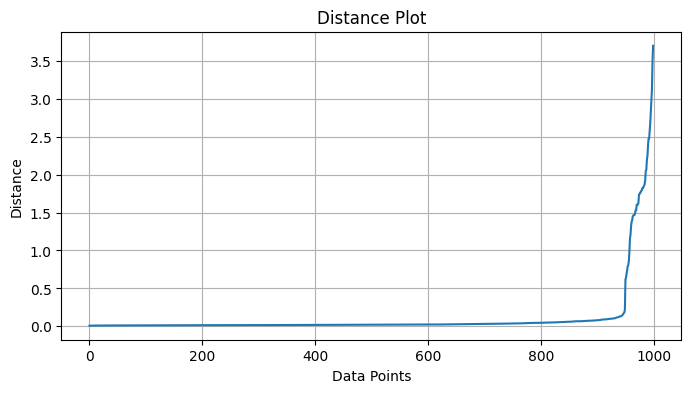

In [39]:
neighbors=NearestNeighbors(n_neighbors=10)
neighbors_fit=neighbors.fit(df_scaled)
distances,indices=neighbors_fit.kneighbors(df_scaled)
distances=np.sort(distances[:,-1])
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Distance Plot')
plt.grid()
plt.show()




In [40]:
dbscan_model=DBSCAN(eps=0.5,min_samples=10)


In [41]:
df['Cluster']=dbscan_model.fit_predict(df_scaled)

In [42]:
df.head(10)

,Length_mm,Weight_g,Cluster
0,100.99,246.88,0
1,99.72,247.22,0
2,101.30,246.81,0
3,103.05,255.95,0
4,99.53,257.10,0
5,99.53,247.15,0
6,103.16,245.84,0
7,101.53,252.36,0
8,99.06,247.24,0
9,101.09,253.16,0


In [43]:
df['Cluster'].value_counts()

,count
Cluster,
0,850
1,100
-1,50


In [44]:
df['Cluster']

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
995,-1
996,-1
997,-1
998,-1


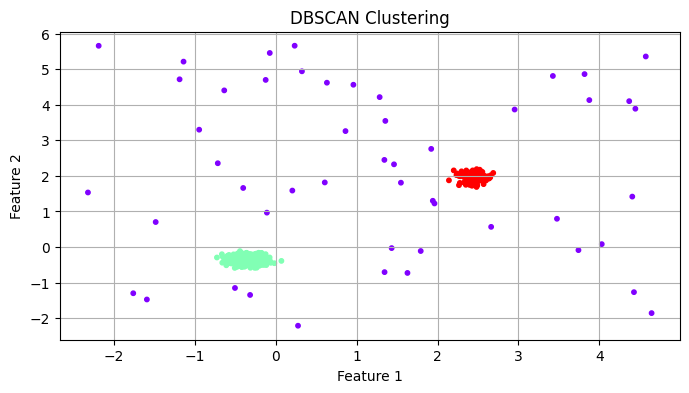

In [48]:
plt.figure(figsize=(8,4))
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=df['Cluster'],cmap='rainbow',s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.grid()
plt.show()

**PCA**: Principal Component Analysis
* Reduce the number of features (Dimensions) or It convert many correlated fetures into few new features(PC:Principal Component)
* Keep maximum information (variance)
* Make data easier to visualize

In [49]:
#PCA
from sklearn.decomposition import PCA


In [50]:
df=pd.DataFrame(
    {
        'Python':[78,85,92,67,88,76,90],
        'ML':[82,79,91,69,84,77,93],
        'PowerBI':[80,83,88,70,82,79,90]
    }
)

In [51]:
df

,Python,ML,PowerBI
0,78,82,80
1,85,79,83
2,92,91,88
3,67,69,70
4,88,84,82
5,76,77,79
6,90,93,90


In [52]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [53]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)

In [54]:
df_pca

array([[-0.47054302, -0.34695673],
       [ 0.07353554,  0.48833728],
       [ 1.9403092 ,  0.02471155],
       [-3.16849281, -0.07282544],
       [ 0.56083837,  0.35839495],
       [-1.08116469, -0.08993234],
       [ 2.1455174 , -0.36172927]])

In [55]:
df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2'])

In [56]:
df_pca

,PC1,PC2
0,-0.470543,-0.346957
1,0.073536,0.488337
2,1.940309,0.024712
3,-3.168493,-0.072825
4,0.560838,0.358395
5,-1.081165,-0.089932
6,2.145517,-0.361729


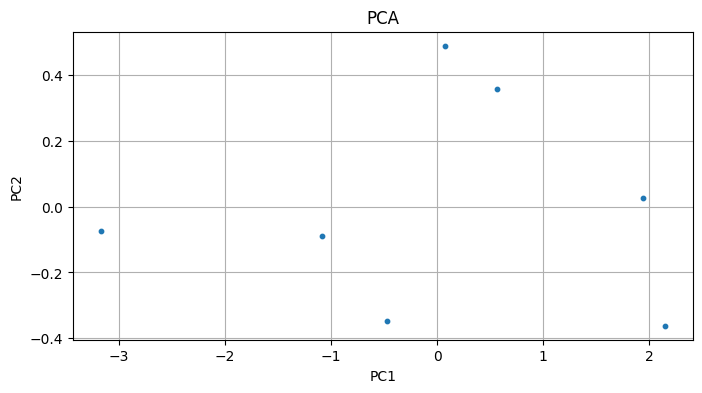

In [58]:
plt.figure(figsize=(8,4))
plt.scatter(df_pca['PC1'],df_pca['PC2'],s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.grid()
plt.show()

In [60]:
# PCA : Example-2
df=pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head()
#

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
df.shape

(200, 5)

In [62]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.shape

(200, 5)

In [65]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)

In [66]:
df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2'])

In [67]:
df_pca

,PC1,PC2
0,-0.470543,-0.346957
1,0.073536,0.488337
2,1.940309,0.024712
3,-3.168493,-0.072825
4,0.560838,0.358395
5,-1.081165,-0.089932
6,2.145517,-0.361729


In [69]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=4,random_state=42)

In [77]:
df_pca['Cluster']=kmeans_model.fit_predict(df_pca)

In [78]:
df_pca

,PC1,PC2,Cluster
0,-0.470543,-0.346957,1
1,0.073536,0.488337,2
2,1.940309,0.024712,0
3,-3.168493,-0.072825,3
4,0.560838,0.358395,2
5,-1.081165,-0.089932,1
6,2.145517,-0.361729,0


In [79]:
final_df=pd.concat([df,df_pca],axis=1)

In [80]:
final_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),PC1,PC2,Cluster
0,1,Male,19,15,39,-0.470543,-0.346957,1.0
1,2,Male,21,15,81,0.073536,0.488337,2.0
2,3,Female,20,16,6,1.940309,0.024712,0.0
3,4,Female,23,16,77,-3.168493,-0.072825,3.0
4,5,Female,31,17,40,0.560838,0.358395,2.0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN,NaN,NaN
196,197,Female,45,126,28,NaN,NaN,NaN
197,198,Male,32,126,74,NaN,NaN,NaN
198,199,Male,32,137,18,NaN,NaN,NaN


In [84]:
centers=kmeans_model.cluster_centers_

In [85]:
print(centers)

[[ 2.0429133  -0.16850886  0.        ]
 [-0.77585385 -0.21844454  1.        ]
 [ 0.31718696  0.42336612  2.        ]
 [-3.16849281 -0.07282544  3.        ]]


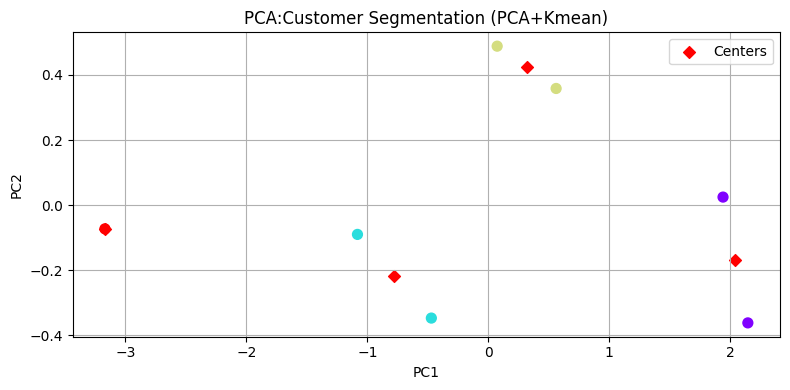

In [91]:
plt.figure(figsize=(8,4))
plt.scatter(final_df['PC1'],final_df['PC2'],c=final_df['Cluster'],cmap='rainbow',s=50)
plt.scatter(centers[:,0],centers[:,1],c='red',marker='D',label='Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA:Customer Segmentation (PCA+Kmean)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [92]:
#PCA variance
pca.explained_variance_ratio_

array([0.95798412, 0.03010235])

In [ ]:
# Use product_quality_2.csv
# Create PCA for 2 components ,  find out PCA variance ratio
# Visualize PCA output